# Práctica 1: Modelos de Regresión Lineal en Machine Learning

Machine Learning

Universidad Iberoamericana Ciudad de México, Otoño 2024

Creado por: Luis Norberto Zúñiga Morales, inspirado en el libro *Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow*.

**Objetivos**:
- Introducir a los estudiantes a los modelos de regresion lineal simple, polinomial y logística desde las perspectiva del Machine Learning.
- Exploarar la idea del gradiente descendiente, el batch gradient descent y el mini-batch gradient descent.
- Visualizar distintos métodos para regularizar modelos de regresión lineal.
- Usar Scikit-learn para implementar modelos de regresión logística.



---



En esta práctica vamos a terminar de estudiar los modelos de regresión lineal que vimos en clase: regresión lineal simple, regresión lineal múltiple, regresión polinomial y regresión logística. Además, recuerden que existen dos formas para entrenar los modelos:

- Una manera directa que se obtiene gracias a un método analítico que nos permite determinar los mejores parámetros dados los datos que buscamos ajustar con el modelo.
- Una manera iterativa por medio de un algoritmo llamado gradiente descendiente que ajusta los parámetros del modelo gradualmente para minimizar la función de costo en el conjunto de entrenamiento, convergiendo enventualmente a un conjunto de valores.

## Regresión Lineal

El modelo más sencillo, la herramienta básica de todo humano que aplica la estadística, el modelo de regresión lineal simplemente es una suma ponderada de las características que se utilizan para modelar el problema en cuestión más un término llamado sesgo (*bias* en inglés):

$$\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n$$

donde:

- $\hat{y}$ es el valor que se predice,
- $n$ es el número de caractéristicas,
- $x_i$ es la $i$-ésima característica,
- $\theta_j$ es el $j$-ésimo parámetro del modelo, empezando desde cero, hasta $n$.

Todo se puede escribir más compacto usando vectores:

$$\hat{y} =  h_\theta(x)= \Theta^T x$$

donde:

- $\Theta$ es el vector $[\theta_0, \dots, \theta_n]$,
- $x$ es el vector $[1, x_1, \dots, x_n]$

Para obtener los parámetros de la hipótesis $h_\theta(x)$ se entrena el modelo con los datos bajo la idea de ajustar los parámetros (en este caso las $\theta$) que hacen que la hipótesis se ajuste a los datos de la mejor manera. Primero necesitamos una forma de medir ese bondad de ajuste, que es la métrica de error. En el caso del modelo regresión se elige el error cuádrático medio.

Al final, los parámetros que resuelven el problema de optimización son:

$$\theta_0 = \bar{y}-\theta_1 \bar{x}$$
$$\theta_1 = \frac{\sum x_i(y_i - \bar{y})}{\sum x_i(x_i - \bar{x})}$$

### La Ecuación Normal

Existe una solución exacta desde el punto de vista matricial, que es la ecuación normal:

$$\hat{\Theta} = (X^T X)^{-1}X^T y$$.

Vamos a ponerla en prueba.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

Vamos a generar unos datos con una tendencia lineal:

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

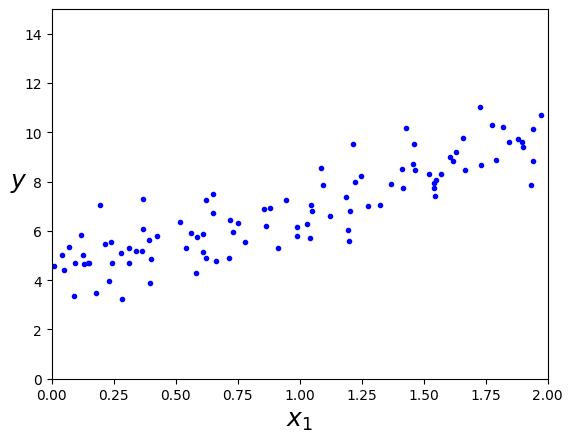

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

**Pregunta**: ¿Qué estamos haciendo para crear los datos en las variables `X` y `y` arriba? Escribir su respuesta en una celda de texto abajo.

Ahora, vamos a determinar $\hat{\Theta}$ usado la Ecuación Normal. Para esto, vamos a usar la función `inv()` del módulo de álgebra lineal de Numpy para calcular la invera de la una matriz, y `dot()` para multiplicar matrices.

In [ ]:
X_bias = np.c_[np.ones((100, 1)), X]  # añadimos el bias x0 = 1 a cada punto
best_theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

La función lineal que usamos como base para genera los datos arriba fue $y=4+3x$ y le sumamos un poco de ruido aleatorio. Veamos que valores tienen los parámetros $\theta_0$ y $\theta_1$ que encontró la ecuación normal:

In [ ]:
best_theta

array([[4.21509616],
       [2.77011339]])

**Pregunta**: ¿Por qué no se pudo recuperar $\theta_0$ = 4 y $\theta_1 = 3$? Escribir su respuesta en una celda de texto abajo.

Vamos ahora a realizar predicciones usando $\hat{\Theta}$:

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(best_theta)
y_predict

array([[4.21509616],
       [9.75532293]])

Y grafiquemos la hipótesis que determinó el modelo:

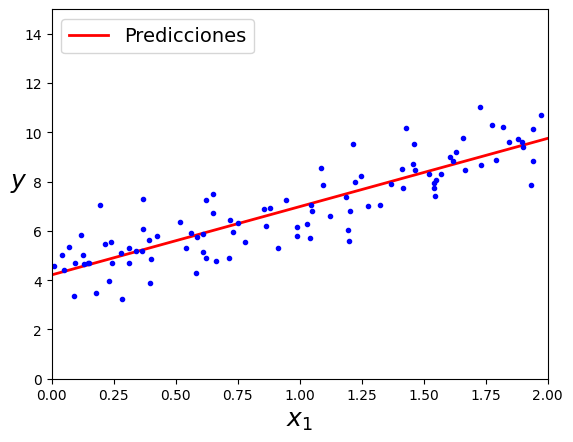

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predicciones")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Realizar regresión lineal con Scikit-Learn es muy sencillo:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

**Pregunta**: ¿Son los mismos valores que se obtuvieron con la ecuación normal? Escribir su respuesta en una celda de texto abajo.

Para predecir un nuevo valor:

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Algunos detalles:

- Esta implemetanción se basa en la pseudoinversa de Moore-Penrose para determinar la inversa de la matriz $X$, la cual utiliza la técnica de descomposición en valores singulares (SVD).
- La ecuación normal necesita calcular la inversa de $X^T X$, que es una matriz de $(n+1)\times(n+1)$. La complejidad computacional de dicha tarea ronda entre $Ο(n^{2.4})$ a $Ο(n^{3})$.
- Al usar la pseudionversa, la complejida baja a $Ο(n^{2})$.

### Gradiente Descendiente

Gradiente descendiente es un algoritmo de optimización genérico capaz de encontrar óptimos locales. La idea principal es ajustar los parámetros iterativamente para minimizar la función de costo:
$$J(𝛉) = \frac{1}{2n}\sum_i {(h_i - y_i)}^2$$

Para el caso de gradiente descendiente, se llegó a las siguientes fórmulas:
$$\theta_0 = \theta_0 - \eta \frac{1}{m} \sum_i (h_i - y_i)$$
$$\theta_j = \theta_j - \eta \frac{1}{m} \sum_i (h_i - y_i)x_j$$

Vamos a implementarlo:

In [ ]:
eta = 0.1  # razón de aprendizaje
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # inicialización aleatoria

for iteration in range(n_iterations):
    gradients = 2/m * X_bias.T.dot(X_bias.dot(theta) - y)
    theta = theta - eta * gradients

Vemoas que obtuvimos en los parámetros:

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

Recuerden que uno de los parámetros que siempre va a impactar al algoritmo de gradiente descendiente es $\eta$. Debemos encontrar el adecuado: si es muy pequeño tarda en converger, si es muy grande puede no converger. Vamos a jugar con este valor en el experimento anterior.

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_bias)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_bias.T.dot(X_bias.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

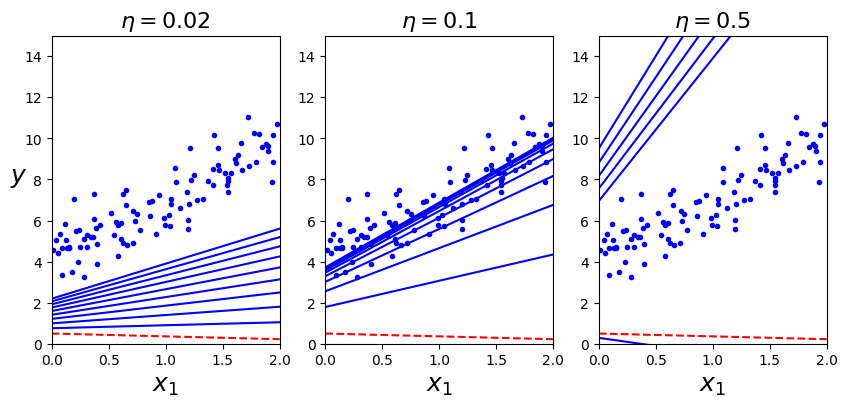

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

**Pregunta**: ¿Qué observan en la gráfica anteriores para los distintos valores de la razón de aprendizaje? Escriban su respuesta en una celda de texto abajo.

### Gradiente Descendiente Estocástico

Uno de los problemas con el batch gradient descent es que utiliza todos los datos del conjunto de entrenamiento para determinar los gradientes en cada paso, lo cual puede ocasionar que sea muy lento si se tienen muchos datos. Para combatir este problema, el gradiente descendiente estocástico elige un subconjunto de los datos de forma aleatoria en cada paso para calcular los gradientes. De esta manera, es más rápido ya que usa menos datos y puede usarse con virtualmente cualquier conjunto de datos. Sin embargo, el factor aleatorio lo hace un poco inestable, pero con el tiempo se acercará al óptimo global.

Usualmente, para mitigar estos factores se suele aplicar una técnica llamada learning rate scheduling que reduce gradualmente la razón de aprendizaje. Se inicia dando saltos grandes, pero en cada nuevo paso se dan saltos más pequeños.

Vamos a implementar todo lo anterior:

In [ ]:
theta_path_sgd = []
m = len(X_bias)
np.random.seed(42)

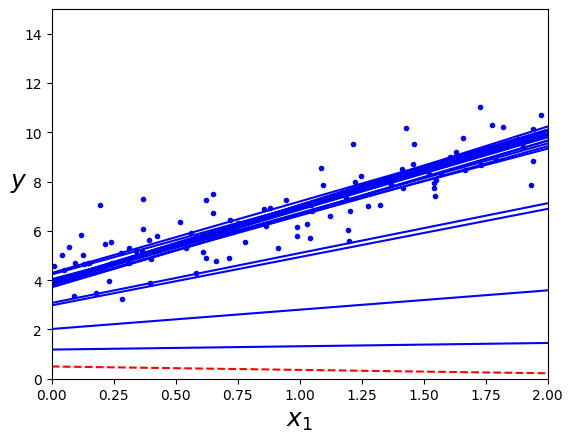

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_bias[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Noten que iteramos rondas de $m$ iteraciones, cada ronda es llamada una *epoch*. A pesar de realizar el proceso de gradiente descendiente 1000 veces, solo se visita el conjunto de entrenamiento 50 veces y obtenemos una buena aproximación:

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

Para realiza regresión lineal usando GDE con Scikit-Learn, se puede usar la clase `SGDRegressor`. El siguiente código ejecuta un máximo de 1000 iteraciones (`max_iter`) o hasta que la pérdida descienda a un valor menor de $10^{-3}$ `tol`. Empieza con una razóna de aprendizaje de 0.1 (`eta0`) .

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### Mini-Batch Gradient Descent

Este último algoritmo de gradiente descendiente utiliza la idea de hacer pequeños subconjuntos de datos llamados mini-batches bajo la idea de que pueden aprovechar una mejora en rendimiento cuando se usa GPU.

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_bias[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

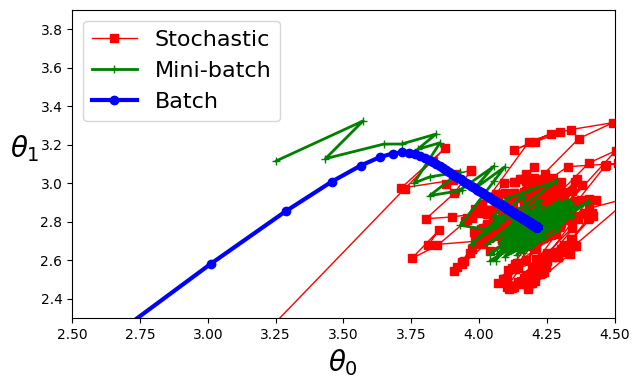

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

**Pregunta**: ¿Qué pueden observar de la gráfica anterior? Escribir su respuesta en una celda de texto abajo.

## Regresion Polinomial

Como vimos en clase, es posible que un modelo lineal no se ajuste perfectamente a todos los datos: es el segundo modelo más sencillo y puede que no sea suficiente para explicar el problema en cuestión. Para resolver este problema, es buena ideaa complicar la hipótesis y usar polinomios para modelar los datos. Veamos el clásico ejemplo generando unos datos con tendencia cuadrática:

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

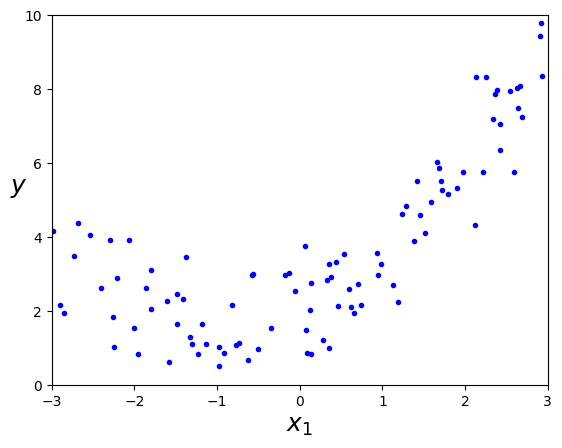

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

**Pregunta**: ¿Creen que sea buena idea usar un modelo lineal como hipótesis? ¿Qué opinan de un polinimio cúbico? Escrbir sus respuestas en una celda de texto abajo.

Para resolver este problema, vamos a usar la clase `PolynomialFeatures` de Scikit-Learn para transformar nuestros datos: añade el cuadrado de cada punto como una nueva característica.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [ ]:
X_poly[0]

array([2.38942838, 5.709368  ])

Ahora, `X_poly` contiene las características originales en `X` además del cuadrado de cada una de ellas. Con este truco, modificamos los datos para ahora ajustar el modelo lineal con ellos:

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

Al realizar el ajuste del modelo de regresión lineal, obtenemos la función $\hat{y} = 1.97 + 0.95x_1 + 0.52x_1^2$ cuando la original es $y = 2 + x_1 + .5x_1^2$. ¡Nada mal!

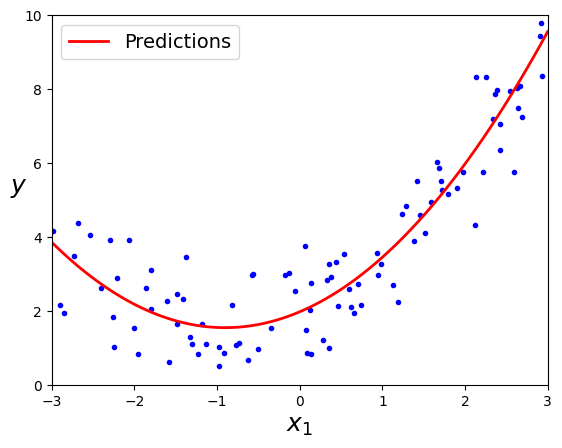

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

En este caso solo tenemos una característica, que es $x_1$, pero si tuvieramos más (e.g., $x_1, x_2, x_3$), el modelo de regresión polinomial puede es capaz de encontrar relaciones entre características. En el caso de `PolynomialFeatures`, este añade todas las combinaciones de las características hasta el grado que le indiquemos. Por ejemplo, si existen dos características $x_1$ y $x_2$, `PolynomialFeatures` con `degree=3` añade las características $x_1^2$, $x_1^2$, $x_1^3$, $x_2^2$, $x_2^3$ y también $x_1 x_2$, $x_1^2 x_2$,  $x_1 x_2^2$

### Curvas de Aprendizaje

Un problema que hay que tener en cuenta al momento de aplicar regresión polinomial es determinar el grado correcto del polinomio. En este caso es algo trivial ya que se ve a simple vista que es una función cuadrática y esta se ajusta bien a los datos. Sin embargo, conforme vayamos aumentando el grado del polinomio, observaremos que este se ajusta cada vez mejor a los datos, inclusive de una forma muy sobreajustada. Esto es peligroso ya que puede llevarnos a resultados no deseables.

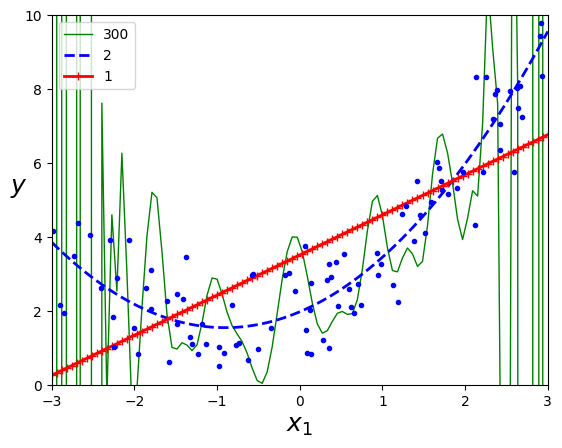

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

**Pregunta**: ¿Qué pueden observar en la gráfica anterior? Escribir su respuesta en una celda de texto abajo.

Vamos a introducir el concepto de las curvas de aprendizaje, que son gráficas que muestran el error de entrenamiento contra el error de validación como un función del tamaño del conjunto de los datos que se usa para entrenar los modelos.

Scikit-Learn tiene una función llamada `learning_curve()` para determinar estas curvas de aprendizaje. En esta primera gráfica, vamos a determinar las curvas de aprendizaje de un modelo de regresión lineal simple para los datos cuadráticos:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

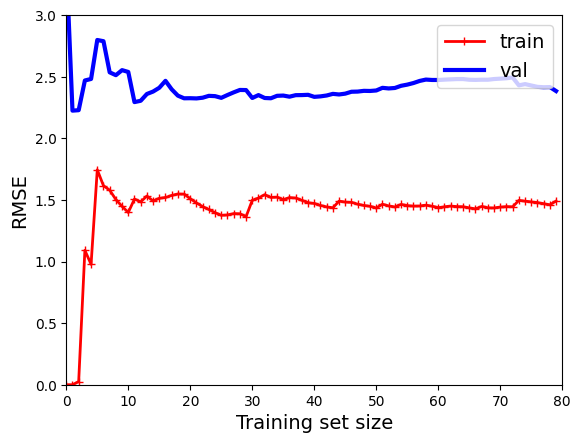

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

En resumen, tenemos el caso del underfitting. Primero, para pocos datos el erro converge rápidamente a cierto valor. Conforme vamos aumentando, no mejora. Además, el error en validación es mucho más alto.

Ahora veamos el caso de un modelo polinomial de grado 10:

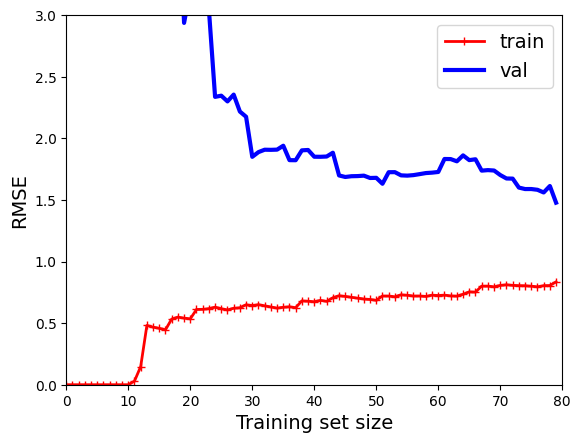

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

El error ahora es un poco más bajo, pero tenemos un gap considerable entre los modelos. Tenemos sobreajuste.

## Regularización en Modelos de Regresión Lineal

Una forma para reducir el sobreajuste que se puede generar en los modelos de regresión lineal que hemos visto hasta el momento es regularizando. En este caso, el modelo que más dolores de cabeza nos puede provocar es el de regresión polinomial por el grado del polinomio: entre más grande sea, máyor es el riesgo del sobreajuste, por lo que debemos encontrar un número que no sea tan grande pero tampoco tan pequeño. En el caso de un modelo lineal simple, la regularización se logra ajustando los pesos del modelo. Existen tres grandes métodos par regularizar modelos de regresión lineal: regresión Ridge, regresión Lasso y regresión elastic net.

### Regresión Ridge

También conocida como regularización de Tikhonov, añade un término de regularización a la función de costo del modelo lineal:

$$J(\theta) = \frac{1}{2n}\sum_{i=1}^{n} (h_\theta(x)-y)^2+\frac{\lambda}{2n}\sum_{j=1}^p \theta_j^2$$

Este término adicional obliga al modelo a ajustarse a los datos y mantiene los pesos tan pequeños como sea posible. Recuerden que el hiperparámetro $\lambda$ controla cuánto se regulariza el modelo. Vamos a visualar este impacto:

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [ ]:
from sklearn.linear_model import Ridge

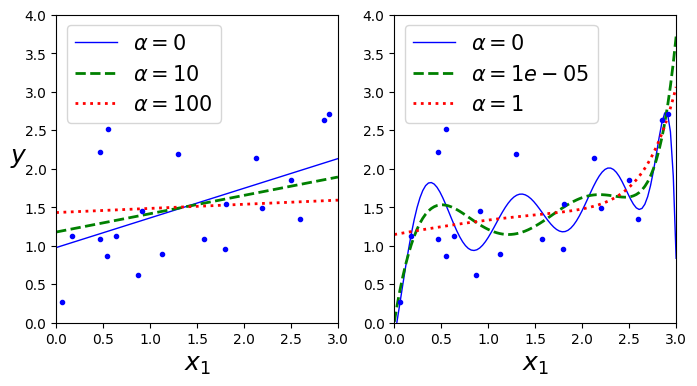

In [ ]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

La figura muestra varios modelos Ridge con diferentes valores de $\lambda$. En la izquierda, se usa un modelo lineal simple con Ridge. A la derecha, se utiliza un modelo polinomial de grado 10 con Ridge.

**Pregunta**: ¿Qué pueden observar en ambas imágenes? Escribir su respuesta en una celda de texto abajo.

El modelo de regresión Ridge tiene solución exacta:

$$\hat{\Theta} = (X^T X + \alpha A)^{-1}X^T y$$.

Si quieren hacer regresión Ridge con Scikit-Learn con la forma exacta pueden hacer lo siguiente (usando el método de factorización de matrices de Cholesky):

In [ ]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

También se puede resolver usando gradiente descendiente:

In [ ]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

### Regresión Lasso

*Least Absolute Shrinkage and Selection Operator Regression* o Lasso,pa' los compas, es otro método de regularización lineal: al igual que Ridge, propone un término de regularización usando norma $l_1$ en lugar de norma $l_2$:

$$J(\theta) = \frac{1}{2n}\sum_{i=1}^{n} (h_\theta(x)-y)^2+\lambda\sum_{j=1}^p ||\theta_j||$$

Vamos a visualizar el efecto de esta forma de regularización con los mismos datos y la misma idea que la gráfica anterior:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


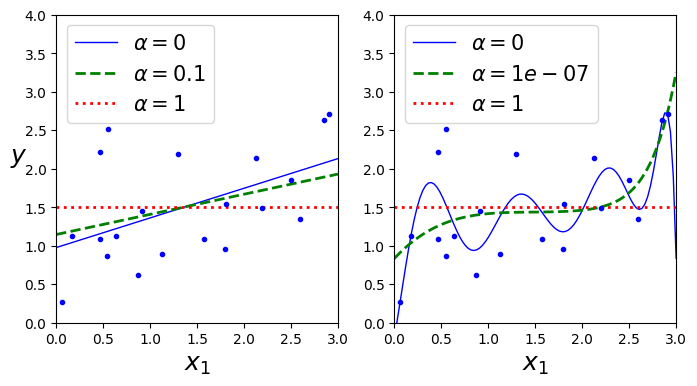

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

**Pregunta**: Comparen la figura anterior con esta nueva figura. ¿Qué diferencias pueden encontrar?

- Una características importante de la regresión Lasso es que tiene a eliminar los pesos de las características menos importantes (los vuelve cero).
- Noten que los términos de penalización son distintos: la norma $l_1$ decrece linealmente con el gradiente descendiente.
- Además, Lasso no es diferenciable en cero.

In [ ]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

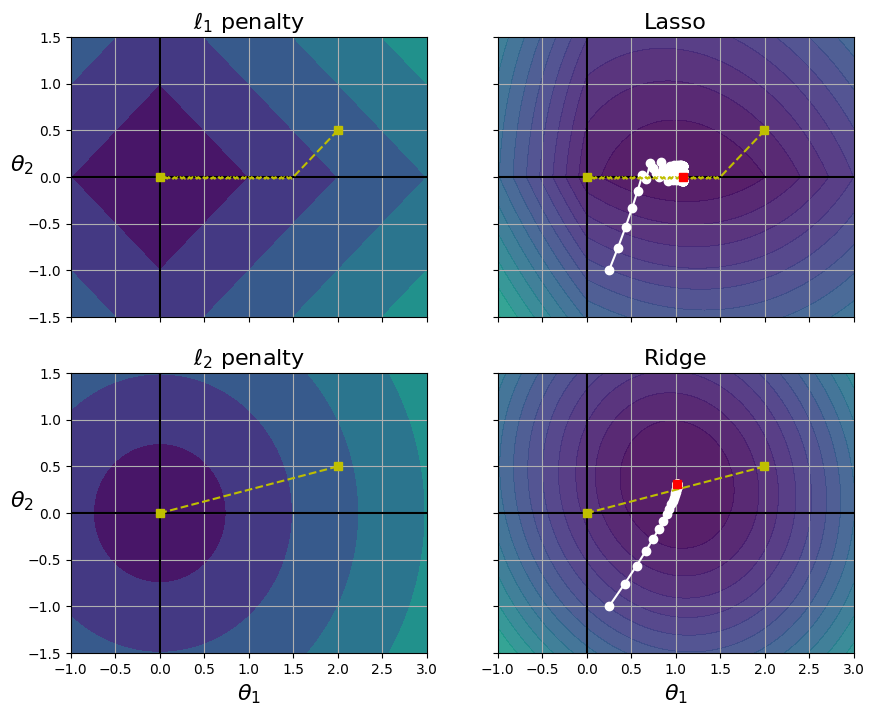

In [ ]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2

    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()

Finalmente, un pequeño ejemplo de como usar Lasso con Scikit-Learn:

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Regresión Elastic Net

La regresión Elastic Net es un punto medio entre regresión Ridge y regresión Lasso. El término de regularización es una suma ponderada de los términos de regularización de Ridge y Lasso con un parámetro $r$ para controlar el aporte a la mezcla:
- Cuando $r = 0$, Elastic Net es equivalente a regresión Ridge.
- Cuando $r=1$, Elastic Net es equivalente a regresión Lasso.

$$ J(\theta) = \frac{1}{2n}\sum_{i=1}^{n} (h_\theta(x)-y)^2+r(\lambda\sum_{j=1}^p ||\theta_j||) + (1-r) \frac{\lambda}{2n}\sum_{j=1}^p \theta_j^2$$

Para implementar esta forma de regularización con Scikit-Learn:

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Regresión Logística

Regresión logística (también conocido como *logit regression*) es un algoritmo de arendizaje que usa un modelo de regresión como base para resolver problemas de clasificación. La idea es estimar la probabilidad de que una instancia pertenezca a una clase en particular. Si es mayor que cierto límite (digamos, 50%), el modelo predice que pertenece a dicha clase, si no, lo etiqueta como la otra clase. Es decir, es un clasificador binario.

Regresión logística es una composición de funciones:

$$h_\theta = g(\Theta^T x) $$

donde $g(z)$ es la función sigmoide:

$$ g(z) = \frac{1}{1+e^{-z}}$$

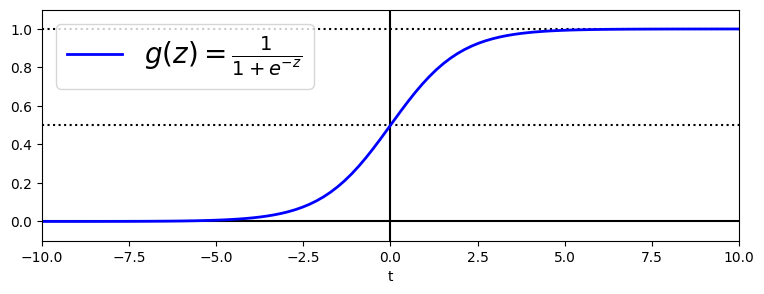

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$g(z) = \frac{1}{1 + e^{-z}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

El modelo realiza una estimación de probabilidad $\hat{p} = h_\theta(x)$. Si es mayor que cierto umbral, pertenece a cierta clase, si no, pertenece a la otra.

Vamos a utilizar el conjunto de datos Iris para visualizar como funciona regresión logística. Recuerden que este dataset contiene el largo y el ancho tanto del sépalo como del pétalo de tres especies de flores: Iris setosa, Iris versicolor y Iris virginica. Empezamos cargando los datos:

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Después, vamos a partir los datos en los conjuntos de entreamiento y prueba:

In [ ]:
from sklearn.model_selection import train_test_split

X = iris["data"][:, 3:]  # petal width
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Veamos como estima las probabilidades el modelo de regresión logística para diferencian entre flores Iris virginica y las demás utilizando únicamente el ancho de pétalo como característica para el entrenamiento:

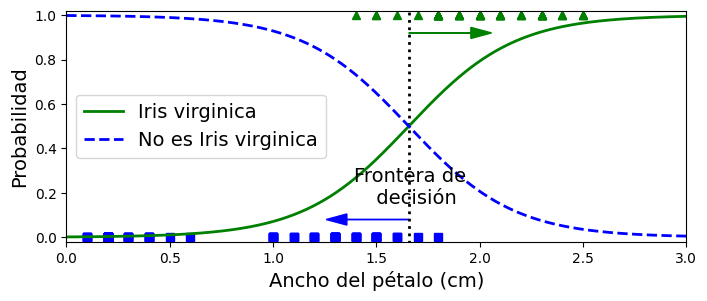

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="No es Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Frontera de \n decisión", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Ancho del pétalo (cm)", fontsize=14)
plt.ylabel("Probabilidad", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

**Pregunta**: ¿Cómo pueden interpretar la figura anterior?

In [ ]:
decision_boundary

array([1.65765766])

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

Ahora, si usamos dos características (ancho y largo del pétalo), el modelo de regresión logística puede estimar la probabilidad de que una nueva flor sea Iris virginica. La linea punteada representa el punto donde la probabilidad es la misma para ambas clases, el borde de decisión. Cada linea paralela representa los puntos donde el modelo calcula una probabilidad en específico, desde 15% hasta 90%.

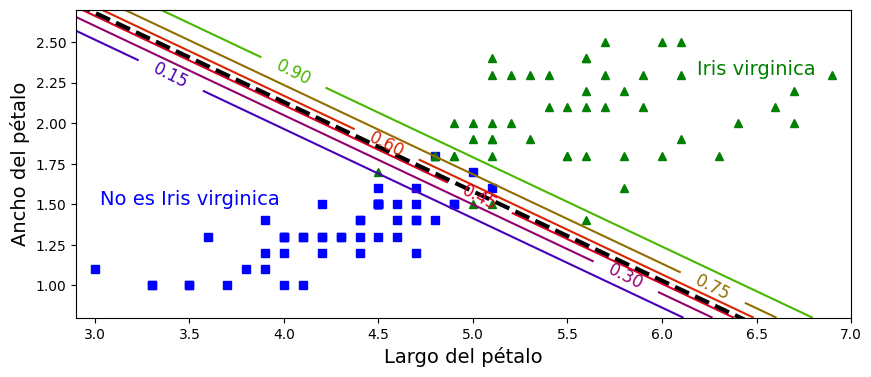

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris.target_names[iris.target] == 'virginica'

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "No es Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Largo del pétalo", fontsize=14)
plt.ylabel("Ancho del pétalo", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()